# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook.

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters.

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation (which is in contrast to traditional image processing, where the filters are designed by an expert).

In [ ]:
from scipy import signal
import numpy as np

# Get a test image

# Add datasets since scipy.misc.ascent deprecated since version 1.10.0
# and replaced by scipy.datasets.ascent
#from scipy import misc,datasets
#image = misc.ascent()

from scipy import datasets
image = datasets.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]])

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]])

In [ ]:
filterResponseGauss = signal.convolve2d(image, gaussFilter, boundary='symm', mode='same')
filterResponseSobelX = signal.convolve2d(image, sobelX, boundary='symm', mode='same')
filterResponseSobelY = signal.convolve2d(image, sobelY, boundary='symm', mode='same')

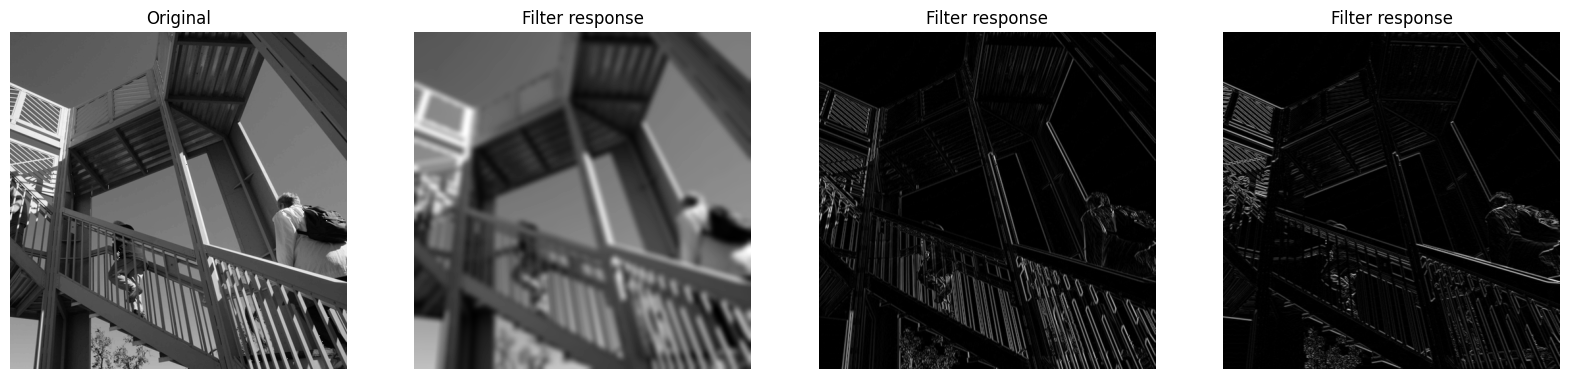

In [ ]:
import matplotlib.pyplot as plt

# Show filter responses
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('Filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Filter response')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?

Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?

Question 3: What is the size of the different filters?

Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?

Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter?

Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?


In [ ]:
# Your code for checking sizes of image and filter responses
print("The size of image is:",image.shape)
print("The size of gaussFilter is:",gaussFilter.shape)
print("The size of sobelX is:",sobelX.shape)
print("The size of sobelY is:",sobelY.shape)

print("The size of filterResponseGauss(Same) is:",filterResponseGauss.shape)
print("The size of filterResponseSobelX(Same) is:",filterResponseSobelX.shape)
print("The size of filterResponseSobelY(Same) is:",filterResponseSobelY.shape)

filterResponseGaussWithValid = signal.convolve2d(image, gaussFilter, boundary='symm', mode='valid')
filterResponseSobelXWithValid = signal.convolve2d(image, sobelX, boundary='symm', mode='valid')
filterResponseSobelYWithValid = signal.convolve2d(image, sobelY, boundary='symm', mode='valid')

print("The size of filterResponseGauss(Valid) is:",filterResponseGaussWithValid.shape)
print("The size of filterResponseSobelX(Valid) is:",filterResponseSobelXWithValid.shape)
print("The size of filterResponseSobelY(Valid) is:",filterResponseSobelYWithValid.shape)


The size of image is: (512, 512)
The size of gaussFilter is: (15, 15)
The size of sobelX is: (3, 3)
The size of sobelY is: (3, 3)
The size of filterResponseGauss(Same) is: (512, 512)
The size of filterResponseSobelX(Same) is: (512, 512)
The size of filterResponseSobelY(Same) is: (512, 512)
The size of filterResponseGauss(Valid) is: (498, 498)
The size of filterResponseSobelX(Valid) is: (510, 510)
The size of filterResponseSobelY(Valid) is: (510, 510)


### Answer to question 1

Gaussian filter will help to smooth the data and remove the noises.

Sobel X filter finds the first-order derivative in the X-direction. It detect the change in the X direction

Sobel Y filter finds the first-order derivative in the Y-direction. It detect the change in the Y direction


### Answer to question 2

The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes

For a single image in the CIFAR-10 dataset, it is a normal image, which contains RGB 3 channels. For a common color image, most of the cases, it contains 3 channels, which is RGB, but for some images, they will have another alpha channel which will become 4 channels for one image.For a grey image, it only contain one chanel which value is between 0 to 255.

### Answer to question 3

The size of gaussFilter is: (15, 15)

The size of sobelX is: (3, 3)

The size of sobelY is: (3, 3)


### Answer to question 4

With Same parameters:

The size of filterResponseGauss() is: (512, 512)

The size of filterResponseSobelX is: (512, 512)

The size of filterResponseSobelY is: (512, 512)


### Answer to question 5

With Valid parameters:

The size of filterResponseGauss() is: (498, 498)

The size of filterResponseSobelX is: (510, 510)

The size of filterResponseSobelY is: (510, 510)

According to the document of signal.convolve2d, it has 3 mode values. Full,valid and same. Full is the default value. Function scipy.signal.convolve2d's first two parameters in1, in2 are image and filter matrix.

The following are from document of scipy.signal.convolve2d.

Full:
The output is the full discrete linear convolution of the inputs(image).

Same:
The output is the same size as in1, centered with respect to the full output.

Valid:
The output consists only of those elements that do not rely on the zero-padding. In ‘valid’ mode, either in1 or in2 must be at least as large as the other in every dimension.

Since Original image's size is 512X512, GaussFilter's size is 15X15 and SobelX (SobelY)'s size is 3X3.

So for Valid case, (response dimension) = (image dimension) - (filter dimension) + 1 ,which is : 498 = 512 - 15 + 1 ;  510 = 512 - 3 + 1


### Answer to question 6

Since size of image will get smaller after apply filter with valid parameter, so in CNNs with many layers, it is not suitable.

Fore example, a 512 X 512 image with 5 X 5 filter will shink to 0 X 0 after apply filter 128 times.

##  Part 3: Get a graphics card

Skip this part if you run on a CPU (recommended)

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [ ]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";

# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

##  Part 4: How fast is the graphics card?

Question 7: Why are the filters used for a color image of size 7 x 7 x 3, and not 7 x 7 ?

Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?

Question 9: Do you think that a graphics card, compared to the CPU, is equally faster for convolving a batch of 1,000 images, compared to convolving a batch of 3 images? Motivate your answer.

### Answer to question 7

For a colour image, it has R G B 3 channels, that's the reason why we need 7 x 7 x 3 filter instead of 7 x 7 filter(which is more suitable for a grey image)

### Answer to question 8

The Conv2D layer in deep learning frameworks is designed for CNN and also optimized to run on GPU. On the other hand, the signal.convolve2d in SciPy  perform more general 2D convolution operation. What Conv2D layer did is a standard 2D convolution operation.

Conv2D applies a 2D convolution between input image and kernels, and those kernels will change during the process of back propagation.(Grayscale image)

But in our case,we use 7 x 7 x 3 filter for color images, we can say that it is a 3D convolution between input image and kernels.

What it did are listed as follows:

1. Sliding a kernel across the input image. recalculate each point value with kernel.
2. Applying an activation function if needed.

### Answer to question 9

We will use hign end RTX 4090 and Intel 14900 as example, every cuda core's speed is 2235 MHz and RTX 4090 has 16,000 CUDA cores. Intel 14900 ,on the other hand,has 8 performance-core with base frequency 3.2 Ghz and 16 efficient-cores with base frequency 2.4Ghz.

We can see that the base speed almost same and GPU has more computation units.

If we apply filters on 1000 image and 3 images at the same time.

In the case of 3 images case, if the image dimension is small, then the CPU wins, if the image size is relatively large, the CPU still win, since the base frequency of the CPU is higher than the GPU.

In the case of 1000 images case, in most cases, GPU win since GPU has more CUDA cores, and algorithms can utilize the parallel function of GPU.

But we also need to consider the time to copy from DDR to GDDR and copy back. Because copying lots of data from DDR to GDDR will take considerable time.

##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [ ]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively,
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

170498071/170498071 [==============================] - 22s 0us/step
Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

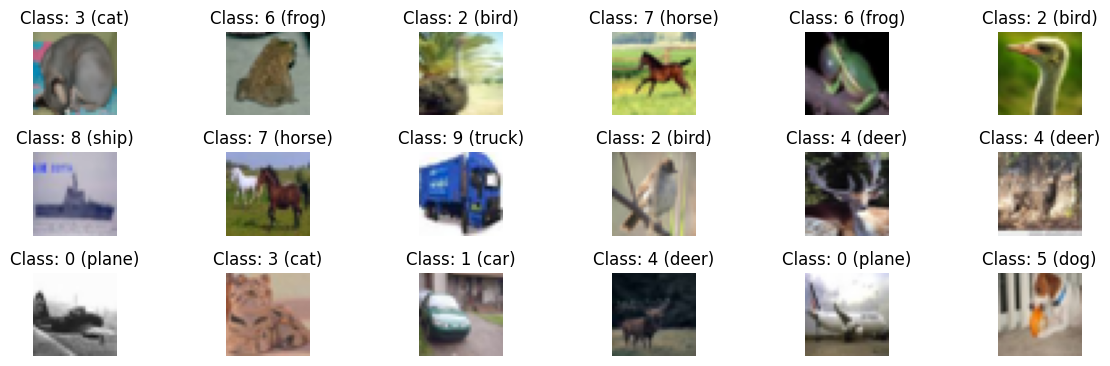

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]

    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

# Your code for splitting the dataset
Xtrain,Xval,Ytrain,Yval = train_test_split(Xtrain,Ytrain,shuffle=False, test_size=0.25)

# Print the size of training data, validation data and test data
print('Xtrain has Shape {}.'.format(Xtrain.shape))
print('Ytrain has Shape {}.'.format(Ytrain.shape))

print('Xval has Shape {}.'.format(Xval.shape))
print('Yval has Shape {}.'.format(Yval.shape))

print('Xtest has Shape {}.'.format(Xtest.shape))
print('Ytest has Shape {}.'.format(Ytest.shape))


Xtrain has Shape (7500, 32, 32, 3).
Ytrain has Shape (7500, 1).
Xval has Shape (2500, 32, 32, 3).
Yval has Shape (2500, 1).
Xtest has Shape (2000, 32, 32, 3).
Ytest has Shape (2000, 1).


##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [ ]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/api/utils/python_utils/#to_categorical-function

In [ ]:
from tensorflow.keras.utils import to_categorical

print("Before convertion \n")
# Print shapes before converting the labels
print('Ytrain has Shape {}.'.format(Ytrain.shape))
print('Yval has Shape {}.'.format(Yval.shape))
print('Ytest has Shape {}.'.format(Ytest.shape))

# Your code for converting Ytrain, Yval, Ytest to categorical
# we have 10 classes in the original dataset
Ytrainc = to_categorical(Ytrain, num_classes=10)
Yvalc = to_categorical(Yval, num_classes=10)
Ytestc = to_categorical(Ytest, num_classes=10)

print("\nAfter convertion \n")

# Print shapes after converting the labels
print('Ytrain has Shape {}.'.format(Ytrainc.shape))
print('Yval has Shape {}.'.format(Yval.shape))
print('Ytest has Shape {}.'.format(Ytest.shape))


Before convertion 

Ytrain has Shape (7500, 1).
Yval has Shape (2500, 1).
Ytest has Shape (2000, 1).

After convertion 

Ytrain has Shape (7500, 10).
Yval has Shape (2500, 1).
Ytest has Shape (2000, 1).


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3).

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/api/layers/core_layers/dense/ and https://keras.io/api/layers/reshaping_layers/flatten/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/) , it relates to how many classes you have.

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import regularizers
from tensorflow.keras.losses import categorical_crossentropy

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01,dropout_rate=0.5):

    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape
    model.add(Conv2D(n_filters, kernel_size=(3, 3), padding='same', activation="relu", input_shape=input_shape))

    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    double_filter = n_filters
    for i in range(n_conv_layers-1):
      double_filter = double_filter * 2
      model.add(Conv2D(double_filter, kernel_size=(3, 3),
                       padding='same',activation="relu"))
      model.add(BatchNormalization())
      model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add flatten layer
    model.add(Flatten())

    # Add intermediate dense layers
    for i in range(n_dense_layers):
      model.add(Dense(units=n_nodes, activation="relu"))
      if use_dropout == True:
            model.add(Dropout(dropout_rate))
      model.add(BatchNormalization())


    # Add final dense layer
    model.add(Dense(units=10, activation="softmax"))

    # Compile model
    opt = Adam(learning_rate=learning_rate)
    model.compile(loss= categorical_crossentropy, metrics=['accuracy'], optimizer=opt)

    return model

In [ ]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):

    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

## 2 convolutional layers, no intermediate dense layers

In [ ]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

n_conv_layers = 2

# Build model
model1 = build_CNN(input_shape = input_shape,n_conv_layers = n_conv_layers)

# Train the model  using training data and validation data
history1 = model1.fit(x=Xtrain,y=Ytrainc , epochs = 20 , validation_data = (Xval,Yvalc), batch_size=batch_size)

Epoch 1/20
75/75 [==============================] - 9s 33ms/step - loss: 2.9244 - accuracy: 0.3341 - val_loss: 1.9136 - val_accuracy: 0.3512
Epoch 2/20
75/75 [==============================] - 1s 16ms/step - loss: 1.5209 - accuracy: 0.5023 - val_loss: 1.7345 - val_accuracy: 0.3756
Epoch 3/20
75/75 [==============================] - 0s 5ms/step - loss: 1.2108 - accuracy: 0.5717 - val_loss: 1.6042 - val_accuracy: 0.4364
Epoch 4/20
75/75 [==============================] - 0s 5ms/step - loss: 1.0784 - accuracy: 0.6119 - val_loss: 1.5085 - val_accuracy: 0.4616
Epoch 5/20
75/75 [==============================] - 0s 5ms/step - loss: 0.9650 - accuracy: 0.6551 - val_loss: 1.4637 - val_accuracy: 0.4928
Epoch 6/20
75/75 [==============================] - 0s 5ms/step - loss: 0.8862 - accuracy: 0.6868 - val_loss: 1.2999 - val_accuracy: 0.5604
Epoch 7/20
75/75 [==============================] - 0s 5ms/step - loss: 0.7921 - accuracy: 0.7189 - val_loss: 1.4131 - val_accuracy: 0.5580
Epoch 8/20
75/75 [

In [ ]:
# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(Xtest,Ytestc)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 15ms/step - loss: 3.1241 - accuracy: 0.5285
Test loss: 3.1241
Test accuracy: 0.5285


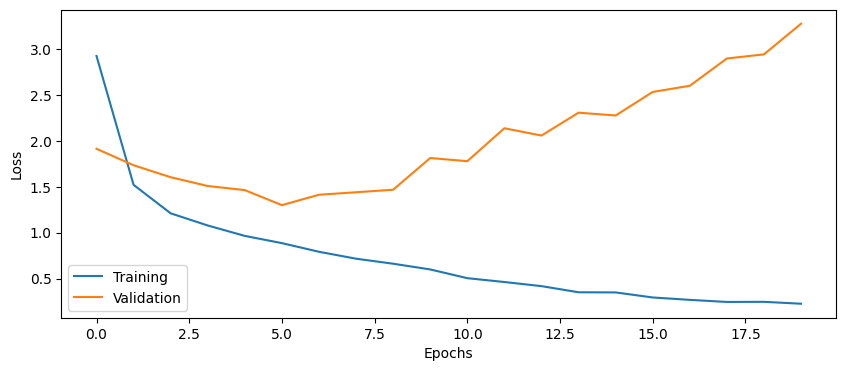

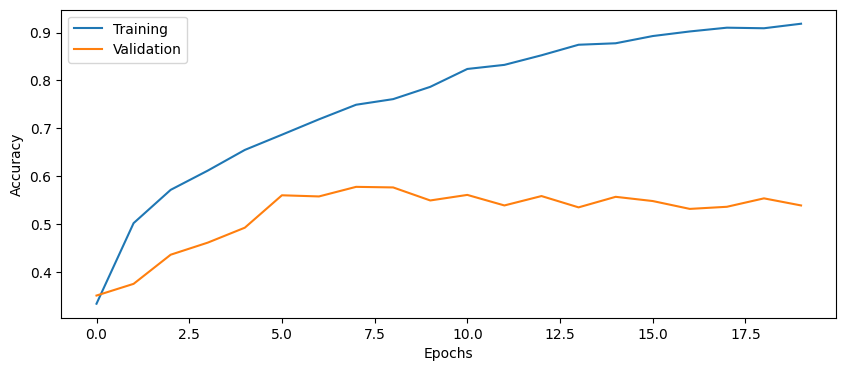

In [ ]:
# Plot the history from the training run
plot_results(history1)

## Part 12: Improving performance

Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ?

Question 10: How big is the difference between training and test accuracy?

Question 11: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?

## Answer to question 10

According to the plot of history1 and the output of score, we found that after training 20 epochs, the training accuracy is 0.5392, meanwhile, test accuracy is 0.5285.

## Answer to question 11

We need to set a smaller batch size in DNN because when we use a smaller batch size, backpropagation has more chances to update the parameters, making the model more stable and avoiding local min/max.

Another main reason is the dimension, input images have 32 x 32 x 3 dimensions compare to 92 in Lab1, which means we need more memory for each image, which limit the batch size.

## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [ ]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

n_conv_layers = 2
n_dense_layers = 1
n_nodes = 50

# Build model
model2 = build_CNN(input_shape = input_shape,
                   n_conv_layers = n_conv_layers,
                   n_dense_layers = n_dense_layers,
                   n_nodes=n_nodes)

# Train the model  using training data and validation data
history2 = model2.fit(x=Xtrain,y=Ytrainc , epochs = 20 , validation_data = (Xval,Yvalc), batch_size=batch_size)

Epoch 1/20
75/75 [==============================] - 4s 14ms/step - loss: 1.6474 - accuracy: 0.4105 - val_loss: 2.2584 - val_accuracy: 0.2240
Epoch 2/20
75/75 [==============================] - 2s 24ms/step - loss: 1.2522 - accuracy: 0.5440 - val_loss: 2.0561 - val_accuracy: 0.2920
Epoch 3/20
75/75 [==============================] - 2s 24ms/step - loss: 1.0415 - accuracy: 0.6293 - val_loss: 1.7331 - val_accuracy: 0.4168
Epoch 4/20
75/75 [==============================] - 0s 6ms/step - loss: 0.8662 - accuracy: 0.6937 - val_loss: 1.5620 - val_accuracy: 0.4812
Epoch 5/20
75/75 [==============================] - 1s 8ms/step - loss: 0.7022 - accuracy: 0.7556 - val_loss: 1.4965 - val_accuracy: 0.5320
Epoch 6/20
75/75 [==============================] - 0s 6ms/step - loss: 0.5335 - accuracy: 0.8120 - val_loss: 1.6207 - val_accuracy: 0.5632
Epoch 7/20
75/75 [==============================] - 1s 10ms/step - loss: 0.4083 - accuracy: 0.8600 - val_loss: 1.8406 - val_accuracy: 0.5608
Epoch 8/20
75/75

In [ ]:
# Evaluate the trained model on test set, not used in training or validation
score = model2.evaluate(Xtest,Ytestc)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 11ms/step - loss: 3.8147 - accuracy: 0.5325
Test loss: 3.8147
Test accuracy: 0.5325


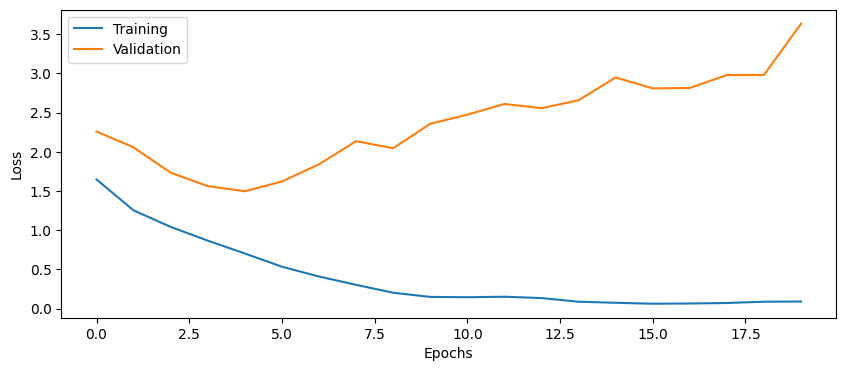

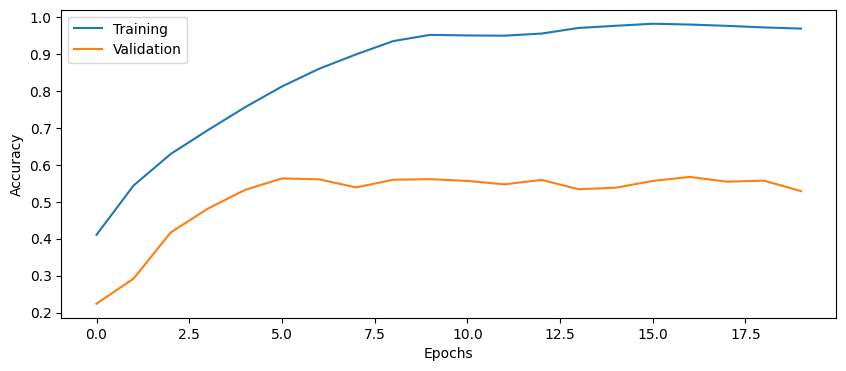

In [ ]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [ ]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

n_conv_layers = 4
n_dense_layers = 1
n_nodes = 50

# Build model
model3 = build_CNN(input_shape = input_shape,
                   n_conv_layers = n_conv_layers,
                   n_dense_layers = n_dense_layers,
                   n_nodes=n_nodes)

# Train the model  using training data and validation data
history3 = model3.fit(x=Xtrain,y=Ytrainc , epochs = 20 , validation_data = (Xval,Yvalc), batch_size=batch_size)

Epoch 1/20
75/75 [==============================] - 6s 12ms/step - loss: 1.7136 - accuracy: 0.3736 - val_loss: 3.0112 - val_accuracy: 0.2068
Epoch 2/20
75/75 [==============================] - 1s 10ms/step - loss: 1.3481 - accuracy: 0.5051 - val_loss: 2.2653 - val_accuracy: 0.2604
Epoch 3/20
75/75 [==============================] - 2s 22ms/step - loss: 1.1757 - accuracy: 0.5800 - val_loss: 1.6409 - val_accuracy: 0.4712
Epoch 4/20
75/75 [==============================] - 1s 8ms/step - loss: 1.0056 - accuracy: 0.6371 - val_loss: 1.4701 - val_accuracy: 0.5204
Epoch 5/20
75/75 [==============================] - 2s 21ms/step - loss: 0.8481 - accuracy: 0.6991 - val_loss: 1.6493 - val_accuracy: 0.5296
Epoch 6/20
75/75 [==============================] - 1s 18ms/step - loss: 0.7087 - accuracy: 0.7511 - val_loss: 1.6188 - val_accuracy: 0.5532
Epoch 7/20
75/75 [==============================] - 2s 28ms/step - loss: 0.5709 - accuracy: 0.7953 - val_loss: 1.5618 - val_accuracy: 0.5872
Epoch 8/20
75/

In [ ]:
# Evaluate the trained model on test set, not used in training or validation
score = model3.evaluate(Xtest,Ytestc)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 4ms/step - loss: 2.5770 - accuracy: 0.6100
Test loss: 2.5770
Test accuracy: 0.6100


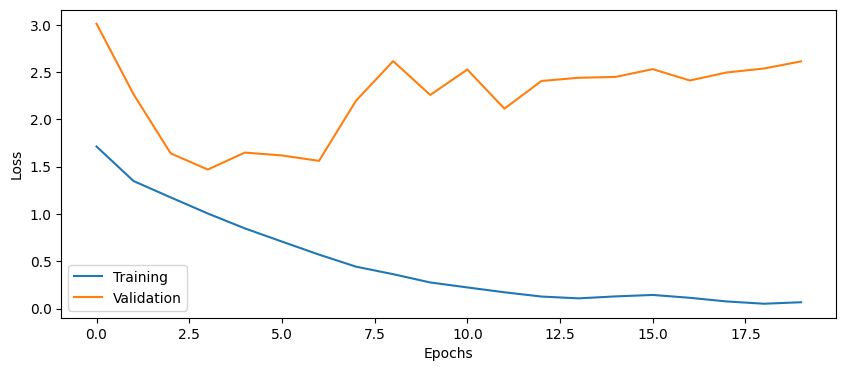

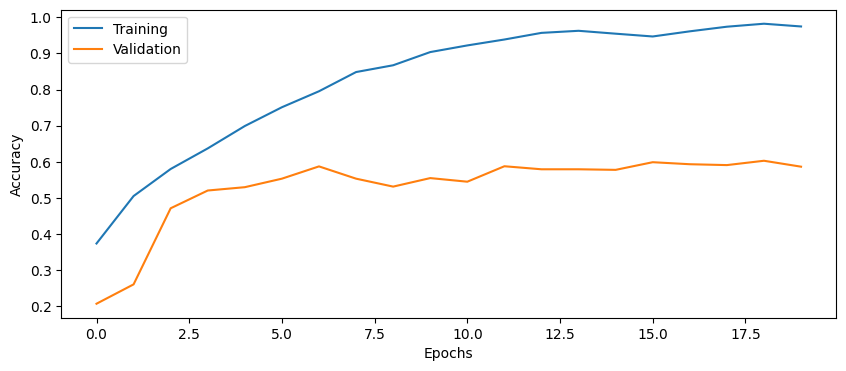

In [ ]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

Question 12: How many trainable parameters does your network have? Which part of the network contains most of the parameters?

Question 13: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output?

Question 14: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/

Question 15: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?

Question 16: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?

Question 17: How does MaxPooling help in reducing the number of parameters to train?

In [ ]:
# Print network architecture
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_6 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                      

## Answer to question 12

According to the summary of the model, we can find thet Trainable params number is 124180.

conv2d_7 contains most of the parameters which is 73856.

## Answer to question 13

The input parameters of tf.keras.layers.Conv2D are filters, kernel_size, strides,
padding, data_format, dilation_rate, groups, activation, use_bias, kernel_initializer, bias_initializer, kernel_regularizer, bias_regularizer, activity_regularizer, kernel_constraint, bias_constraint.

For more detailed info please check https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D.

For the input of Conv2D, it is typically a 4D tensor representing a batch of input images tensor, the shape of this tensor is (batch_size, height, width, channels).In our case, the shape of the input tensor would be (100, 32, 32, 3)

Since we use the padding='same' when adding the Conv2D layer, the input and output dimensions do not change. In the case of the first Conv2D layer, channel number 3 becomes nfilter number 16. The remaining Conv2D's input and output remain the same.

For example, conv2d_4 (Conv2D):(32, 32, 16) and conv2d_5 (Conv2D):(32, 32, 16) at the very begining of this model.

## Answer to question 14

Yes. The parameter data_format parameter in Conv2D can be set to "channels_last" or "channels_first".

"channels_last" corresponds to inputs with shape (batch_size, height, width, channels) while "channels_first" corresponds to inputs with shape (batch_size, channels, height, width).

Which means both of them set batch_size as its first parameter.




## Answer to question 15

As discussed in question 13, if a convolutional layer that contains 128 filters is applied to an input with 32 channels, the number of channels in the output will be the filter number, which is 128.

## Answer to question 16

The correct number of parameters in each Conv2D layer has the following formula.
K x K x N, where K x K is the filter size N is the number of input channels.

For example, 3 x 3 x 3 means 3 x 3 filter and 3 input channels(color image).


## Answer to question 17

Max pooling is performed on the convolutional layers of a CNN. It works like a convolutional layer,  instead of performing a matrix multiplication, max pooling takes the maximum value within the window.

This means the output of the max pooling layer will get smaller compared to the input of the max pooling layer, which will reduce the dimensions of the feature maps.

Also, it helps to reduce the complexity of the model, with fewer parameters, the model is easier to generalize and helps to reduce the chance of overfitting. The related computation cost will also go down.

##  Part 14: Dropout regularization

Add dropout regularization between each intermediate dense layer, dropout probability 50%.

Question 18: How much did the test accuracy improve with dropout, compared to without dropout?

Question 19: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?


# Answer to question 18


The test accuracy with dropout is 0.6060 while the test accuracy  without dropout which is 0.6100

# Answer to question 19

we can apply the following regularization to Conv2D:
According to the document of tf.keras.regularizers, we can apply the following regularizers to Conv2D.

1. L1: A regularizer that applies a L1 regularization penalty.

2. L1L2: A regularizer that applies both L1 and L2 regularization penalties.

3. L2: A regularizer that applies a L2 regularization penalty.

4. OrthogonalRegularizer: Regularizer that encourages input vectors to be orthogonal to each other.

The way to add L2 regularization to Conv2D is as follows, we use an example to illustrate it.

``` python
Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(32, 32, 3)),
```

## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [ ]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

n_conv_layers = 4
n_dense_layers = 1
n_nodes = 50

# Build model
model4 = build_CNN(input_shape = input_shape,
                   n_conv_layers = n_conv_layers,
                   n_dense_layers = n_dense_layers,
                   n_nodes=n_nodes,
                   use_dropout=True)

# Train the model  using training data and validation data
history4 = model4.fit(x=Xtrain,y=Ytrainc , epochs = epochs , validation_data = (Xval,Yvalc), batch_size=batch_size)

Epoch 1/20
75/75 [==============================] - 7s 29ms/step - loss: 1.9491 - accuracy: 0.3003 - val_loss: 2.0866 - val_accuracy: 0.2644
Epoch 2/20
75/75 [==============================] - 1s 10ms/step - loss: 1.6038 - accuracy: 0.3977 - val_loss: 2.0346 - val_accuracy: 0.2944
Epoch 3/20
75/75 [==============================] - 1s 11ms/step - loss: 1.4670 - accuracy: 0.4495 - val_loss: 1.5201 - val_accuracy: 0.4472
Epoch 4/20
75/75 [==============================] - 1s 11ms/step - loss: 1.3731 - accuracy: 0.4945 - val_loss: 1.5318 - val_accuracy: 0.4712
Epoch 5/20
75/75 [==============================] - 1s 8ms/step - loss: 1.2662 - accuracy: 0.5376 - val_loss: 1.4883 - val_accuracy: 0.4712
Epoch 6/20
75/75 [==============================] - 1s 19ms/step - loss: 1.1557 - accuracy: 0.5844 - val_loss: 1.3291 - val_accuracy: 0.5448
Epoch 7/20
75/75 [==============================] - 1s 10ms/step - loss: 1.0529 - accuracy: 0.6219 - val_loss: 1.3381 - val_accuracy: 0.5504
Epoch 8/20
75/

In [ ]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(Xtest,Ytestc)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 3ms/step - loss: 1.7823 - accuracy: 0.6060
Test loss: 1.7823
Test accuracy: 0.6060


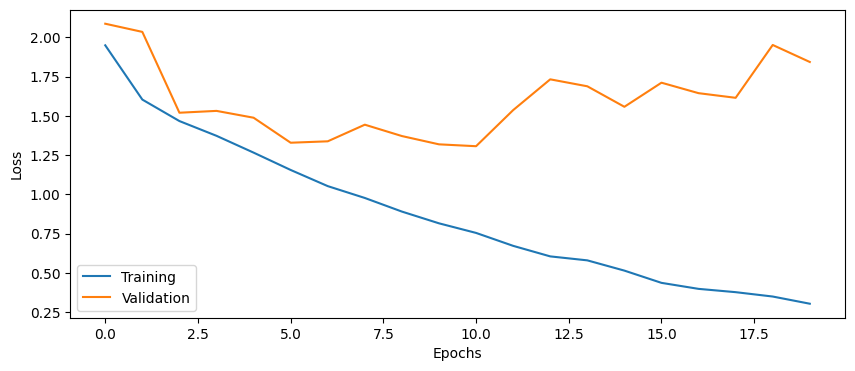

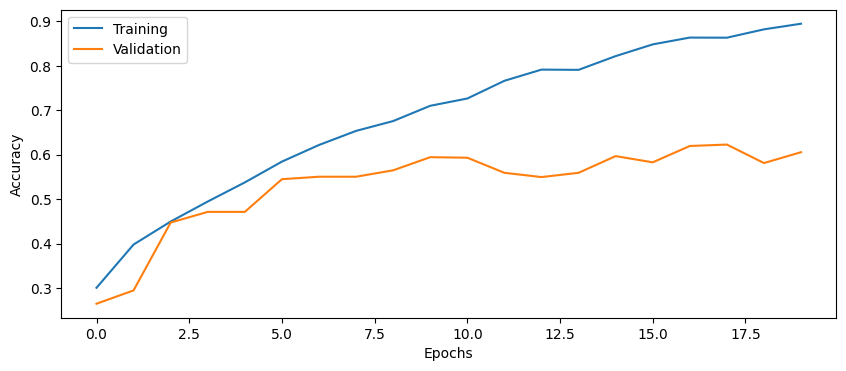

In [ ]:
# Plot the history from the training run
plot_results(history4)

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

Question 20: How high test accuracy can you obtain? What is your best configuration?

## Answer to question 20
The highest test accuracy we got is 0.6145

the best configuration are listed as follows.

```python
batch_size = 200
epochs = 20
n_conv_layers = 4
n_filters = 16
n_dense_layers = 1
n_nodes = 100
learning_rate=0.01
use_dropout = False
```



## Your best config

In [ ]:
# Setup some training parameters
batch_size = 200
epochs = 20
input_shape = Xtrain.shape[1:]

n_conv_layers = 4
n_filters = 16
n_dense_layers = 1
n_nodes = 100
learning_rate=0.01

# Build model
model5 = build_CNN(input_shape = input_shape,
                   n_filters = n_filters,
                   n_conv_layers = n_conv_layers,
                   n_dense_layers = n_dense_layers,
                   n_nodes=n_nodes,
                   use_dropout=False,
                   learning_rate = learning_rate)

# Train the model  using training data and validation data
history5 = model5.fit(x=Xtrain,y=Ytrainc , epochs = epochs , validation_data = (Xval,Yvalc), batch_size=batch_size)

Epoch 1/20
38/38 [==============================] - 4s 21ms/step - loss: 1.8045 - accuracy: 0.3600 - val_loss: 2.7258 - val_accuracy: 0.2876
Epoch 2/20
38/38 [==============================] - 2s 56ms/step - loss: 1.3741 - accuracy: 0.4943 - val_loss: 1.9929 - val_accuracy: 0.3280
Epoch 3/20
38/38 [==============================] - 0s 12ms/step - loss: 1.1937 - accuracy: 0.5692 - val_loss: 2.1699 - val_accuracy: 0.3264
Epoch 4/20
38/38 [==============================] - 0s 11ms/step - loss: 1.0528 - accuracy: 0.6253 - val_loss: 2.5042 - val_accuracy: 0.2896
Epoch 5/20
38/38 [==============================] - 0s 10ms/step - loss: 0.8827 - accuracy: 0.6843 - val_loss: 1.8706 - val_accuracy: 0.4348
Epoch 6/20
38/38 [==============================] - 0s 10ms/step - loss: 0.7369 - accuracy: 0.7420 - val_loss: 1.7779 - val_accuracy: 0.4556
Epoch 7/20
38/38 [==============================] - 1s 15ms/step - loss: 0.6159 - accuracy: 0.7824 - val_loss: 1.5412 - val_accuracy: 0.5408
Epoch 8/20
38

In [ ]:
# Evaluate the trained model on test set, not used in training or validation
score = model5.evaluate(Xtest,Ytestc)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 3ms/step - loss: 2.4288 - accuracy: 0.6145
Test loss: 2.4288
Test accuracy: 0.6145


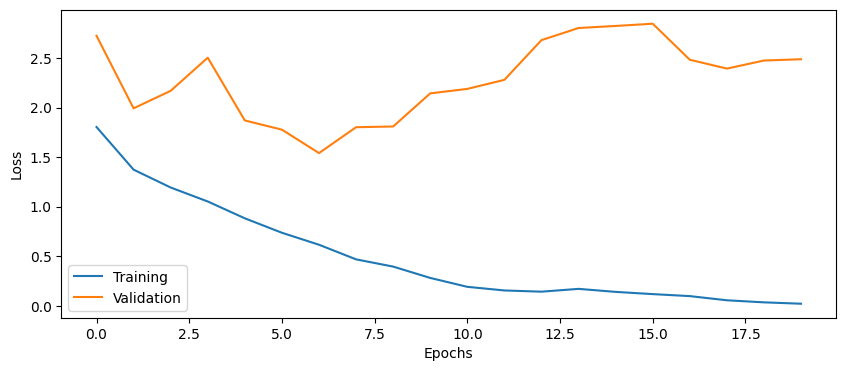

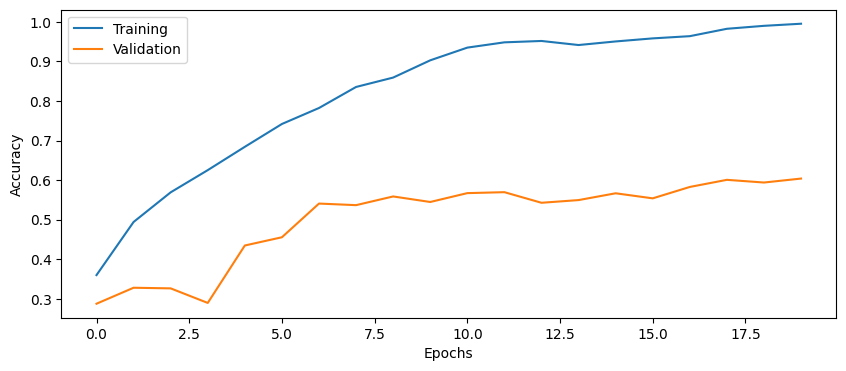

In [ ]:
# Plot the history from the training run
plot_results(history5)

##  Part 16: Rotate the test images

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

Question 21: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.

## Answer to question 21

The test accuracy for rotated test images is pretty low, which is around 0.2430 compared to the test accuracy for non-rotated test images is 0.6145

The reason behind this is the training data problem which causes the model generalization performance. Our training data does not contain rotated images, when we try to classify the rotated images, the model can not find a similar labelled image as a reference. So this one is the expected result.

In [ ]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))

    return images_rot

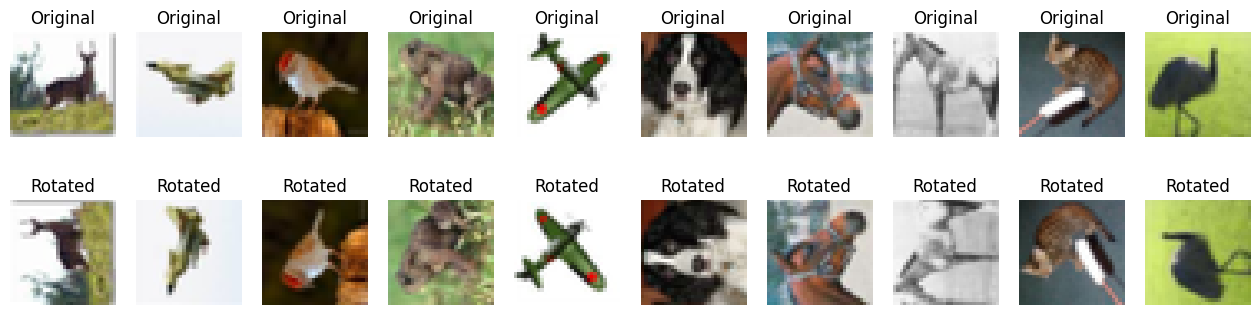

In [ ]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)

    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [ ]:
# Evaluate the trained model on rotated test set
score = model5.evaluate(Xtest_rotated,Ytestc)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 16ms/step - loss: 7.6294 - accuracy: 0.2430
Test loss: 7.6294
Test accuracy: 0.2430


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator , the .flow(x,y) functionality

Make sure to use different subsets for training and validation when you setup the flows, otherwise you will validate on the same data...

In [ ]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), _ = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [ ]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
# Use a rotation range of 30 degrees, horizontal and vertical flipping
from keras.preprocessing.image import ImageDataGenerator

IDG = ImageDataGenerator(rotation_range=30,horizontal_flip=True,
                         vertical_flip=True,validation_split=0.2)

# Setup a flow for training data, assume that we can fit all images into CPU memory
train_Flow = IDG.flow(x=Xtrain, y=Ytrain, batch_size=100, subset = "training")

# Setup a flow for validation data, assume that we can fit all images into CPU memory
validate_Flow = IDG.flow(x=Xtrain, y=Ytrain, batch_size=100, subset = "validation")


## Part 18: What about big data?

Question 22: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?

## Answer to question 22

There are several ways to fit the data into memory.

Method 1: Decrease the training image size, but using this approach we will lose original features which will decrease the performance of the model.

Method 2: Minimize the batch size so that every batch can fit into the GPU memory. The disadvantage of this approach is the computational speed will be slower.

Method 3: If all the data can not fit into the main memory, we can stream the data from the hard drive or use virtual memory, both of them will decrease the computation performance and increase training time.


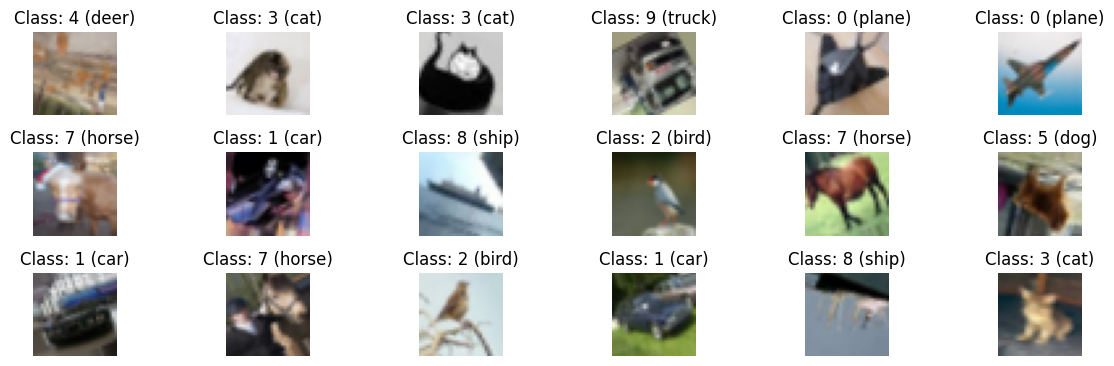

In [ ]:
# Plot some augmented images
plot_datagen = IDG.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_datagen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]

    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/api/models/model_training_apis/#fit-method for how to use model.fit with a generator instead of a fix dataset (numpy arrays)

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size
    
This is required since with a generator, the fit function will not know how many examples your original dataset has.

Question 23: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. We are here talking about the number of training epochs required to reach a certain accuracy, and not the training time in seconds. What parameter is necessary to change to perform more training?

Question 24: What other types of image augmentation can be applied, compared to what we use here?

## Answer to question 23

As can be seen from the plot below, the training accuracy without augmentation increases much faster compared to the training accuracy with augmentation.

The reason behind this is augmentation create new images which means we showing new images in every epoch, instead of the same images over and over.

## Answer to question 24

In the above code, we already use rotation, horizontal_flip, and vertical_flip, we can also apply Scaling, Brightness adjustment, Contrast adjustment, Noise addition, Color jitter, Blur, Elastic deformation etc to the original image to create "new" training data.

In [ ]:
# Setup some training parameters
batch_size = 100
epochs = 200
input_shape = Xtrain.shape[1:]

n_conv_layers = 4
n_dense_layers = 1
n_nodes = 100
learning_rate=0.01

# Build model (your best config)
model6 = build_CNN(input_shape = input_shape,
                   n_conv_layers = n_conv_layers,
                   n_dense_layers = n_dense_layers,
                   n_nodes=n_nodes,
                   use_dropout=False,

                   learning_rate = learning_rate)

validation_split=0.2


history6 = model6.fit(train_Flow,
                      validation_data = validate_Flow,
                      steps_per_epoch = len(Xtrain)*(1 - validation_split)/batch_size,
                      validation_steps = len(Xtrain)*validation_split/batch_size,
                      batch_size = batch_size,
                      epochs = epochs)

Epoch 1/200
80/80 [==============================] - 11s 100ms/step - loss: 1.9114 - accuracy: 0.3108 - val_loss: 2.1167 - val_accuracy: 0.2835
Epoch 2/200
80/80 [==============================] - 5s 63ms/step - loss: 1.6509 - accuracy: 0.3907 - val_loss: 2.1387 - val_accuracy: 0.2620
Epoch 3/200
80/80 [==============================] - 7s 90ms/step - loss: 1.5576 - accuracy: 0.4274 - val_loss: 1.5858 - val_accuracy: 0.4255
Epoch 4/200
80/80 [==============================] - 6s 74ms/step - loss: 1.5035 - accuracy: 0.4526 - val_loss: 1.4995 - val_accuracy: 0.4620
Epoch 5/200
80/80 [==============================] - 6s 78ms/step - loss: 1.4145 - accuracy: 0.4794 - val_loss: 1.8231 - val_accuracy: 0.4090
Epoch 6/200
80/80 [==============================] - 7s 93ms/step - loss: 1.3790 - accuracy: 0.4958 - val_loss: 1.5926 - val_accuracy: 0.4395
Epoch 7/200
80/80 [==============================] - 8s 101ms/step - loss: 1.3268 - accuracy: 0.5169 - val_loss: 1.4483 - val_accuracy: 0.5075
Epo

In [ ]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytestc, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytestc, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1.6627
Test accuracy: 0.6560
Test loss: 4.3088
Test accuracy: 0.3215


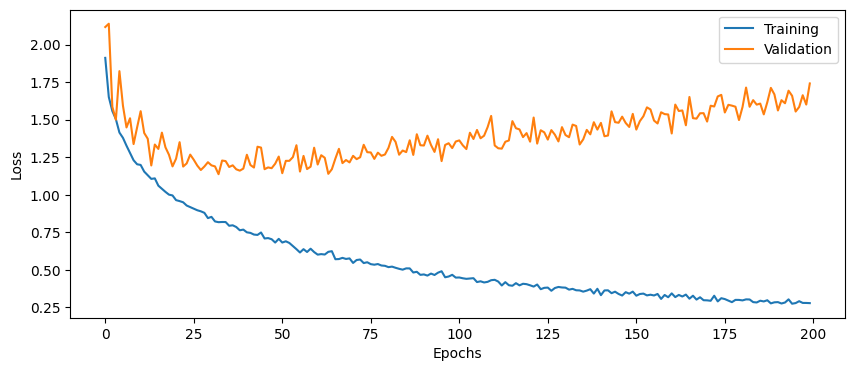

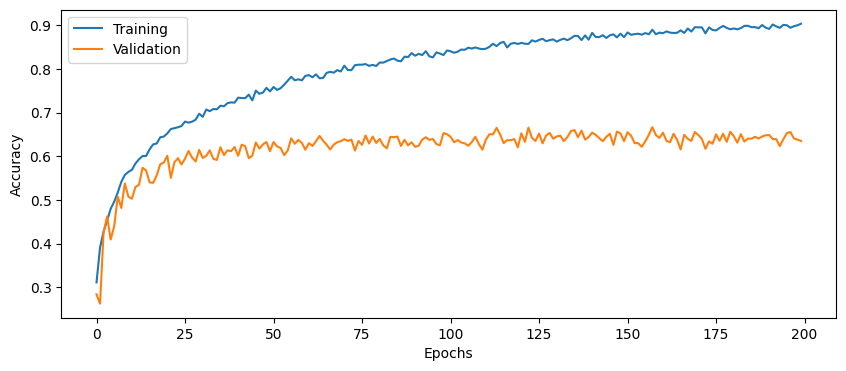

In [ ]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly, these cells are already finished.

In [ ]:
# Find misclassified images
y_pred=model6.predict(Xtest)
y_pred=np.argmax(y_pred,axis=1)

y_correct = np.argmax(Ytest,axis=-1)

miss = np.flatnonzero(y_correct != y_pred)

63/63 [==============================] - 0s 2ms/step


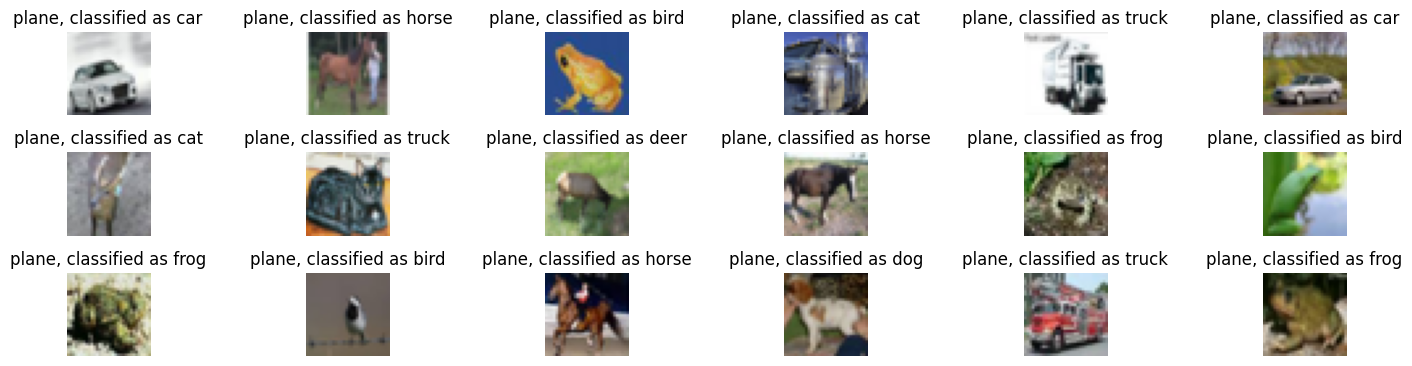

In [ ]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]

    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

Question 25: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?

Question 26: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?

## Answer to question 25

No, The reason why we can not use different size images as input is mainly
because the dense layers are expected to accept fixed-size images

## Answer to question 26

Yes, we can resize the input image to the expected size.

By using tensorflow. keras.preprocessing image, we can load the image and resize it to the size that we need.

Meanwhile, we can use full connected network since it does not have any dense layers.

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database (several million images, 1000 classes). Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

Question 27: How many convolutional layers does ResNet50 have?

Question 28: How many trainable parameters does the ResNet50 network have?

Question 29: What is the size of the images that ResNet50 expects as input?

Question 30: Using the answer to question 28, explain why the second derivative is seldom used when training deep networks.

Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine or your own computer. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/api/applications/ and https://keras.io/api/applications/resnet/#resnet50-function

Useful functions

`image.load_img` in tensorflow.keras.preprocessing

`image.img_to_array` in tensorflow.keras.preprocessing

`ResNet50` in tensorflow.keras.applications.resnet50

`preprocess_input` in tensorflow.keras.applications.resnet50

`decode_predictions` in tensorflow.keras.applications.resnet50

`expand_dims` in numpy


## Answer to question 27

ResNet50 has 50-layer convolutional neural network (48 convolutional layers, one MaxPool layer, and one average pool layer).

## Answer to question 28

ResNet-50 contains around 25.6 million parameters including over 23 million trainable parameters.

## Answer to question 29
Resnet-50 requires input images to be of size 224 × 224

## Answer to question 30
Calculating and storing the Hessian matrix can be computationally expensive, especially for large networks with millions of parameters. Use ResNet-50 as example, it contains around 25.6 million parameters, and it will take long time to calculate second derivative.

35363/35363 [==============================] - 0s 3us/step
('goldfinch', 0.98532975)


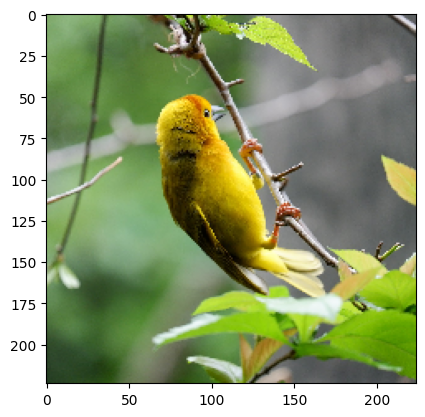

1/1 [==============================] - 1s 1s/step
('peacock', 0.9985185)


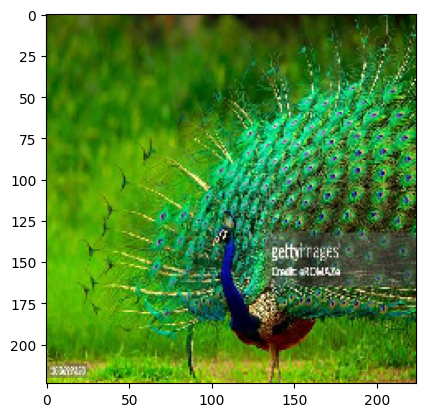

1/1 [==============================] - 1s 929ms/step
('golden_retriever', 0.461679)


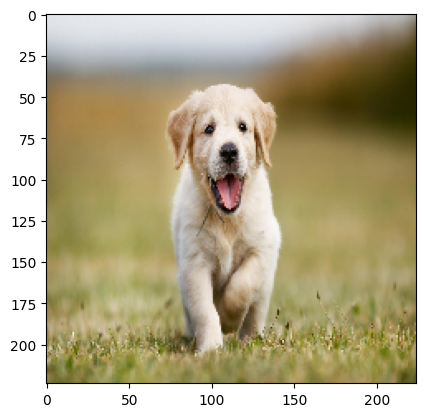

1/1 [==============================] - 1s 1s/step
('lion', 0.8851059)


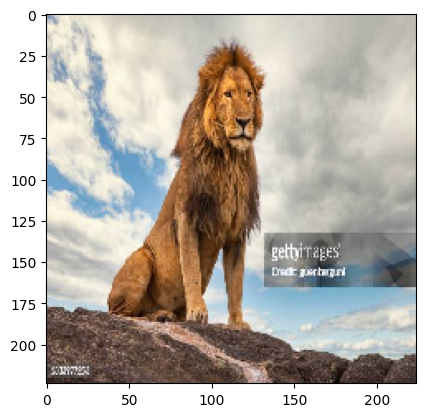

1/1 [==============================] - 1s 1s/step
('orangutan', 0.98837215)


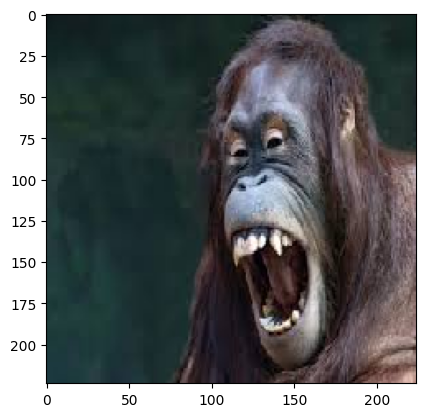

In [ ]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice.
# The preprocessing should transform the image to a size that is expected by the CNN.

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

images_folder = "images"
images_to_load = ['1.jpg','2.jpg','3.jpg','4.jpg','5.jpg',]

for i in range(len(images_to_load)):
    im_path = images_folder + "/" + images_to_load[i]
    im = image.load_img(im_path, target_size=(224, 224))
    inp = image.img_to_array(im)
    inp = np.expand_dims(inp, axis=0)
    inp = preprocess_input(inp)
    model_res = ResNet50()
    predLabs = decode_predictions(model_res.predict(inp))
    print(predLabs[0][0][1:3])
    plt.imshow(im)
    plt.show()
